In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('boston.csv', header=0, delimiter=',', encoding='utf-8')	
# Lấy dữ liệu từ dòng index 100 đến 299 (bao gồm cả dòng 100 và dòng 299)
subset_data = df.iloc[100:300]
subset_data



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
100,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384.0,20.9,394.76,9.42,27.5
101,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384.0,20.9,395.58,7.67,26.5
102,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384.0,20.9,70.80,10.63,18.6
103,0.21161,0.0,8.56,0,0.520,6.137,87.4,2.7147,5,384.0,20.9,394.47,13.44,19.3
104,0.13960,0.0,8.56,0,0.520,6.167,90.0,2.4210,5,384.0,20.9,392.69,12.33,20.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.12932,0.0,13.92,0,0.437,6.678,31.1,5.9604,4,289.0,16.0,396.90,6.27,28.6
296,0.05372,0.0,13.92,0,0.437,6.549,51.0,5.9604,4,289.0,16.0,392.85,7.39,27.1
297,0.14103,0.0,13.92,0,0.437,5.790,58.0,6.3200,4,289.0,16.0,396.90,15.84,20.3
298,0.06466,70.0,2.24,0,0.400,6.345,20.1,7.8278,5,358.0,14.8,368.24,4.97,22.5


In [18]:
subset_data = subset_data[['AGE', 'LSTAT', 'MEDV']]
x = subset_data[['AGE', 'LSTAT']].values
y = subset_data[['MEDV']].values

In [19]:
subset_data

,AGE,LSTAT,MEDV
100,79.9,9.42,27.5
101,71.3,7.67,26.5
102,85.4,10.63,18.6
103,87.4,13.44,19.3
104,90.0,12.33,20.1
...,...,...,...
295,31.1,6.27,28.6
296,51.0,7.39,27.1
297,58.0,15.84,20.3
298,20.1,4.97,22.5


In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=16)

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

steps = [('logtransform', FunctionTransformer(np.log)),
    ('minmaxnormalize', MinMaxScaler()),
    ('polynomial', PolynomialFeatures(include_bias=False, degree=5)),
    ('modelLR', LinearRegression())]
pipe = Pipeline(steps)
pipe

Pipeline(steps=[('logtransform', FunctionTransformer(func=<ufunc 'log'>)),
                ('minmaxnormalize', MinMaxScaler()),
                ('polynomial',
                 PolynomialFeatures(degree=5, include_bias=False)),
                ('modelLR', LinearRegression())])

In [22]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('logtransform', FunctionTransformer(func=<ufunc 'log'>)),
                ('minmaxnormalize', MinMaxScaler()),
                ('polynomial',
                 PolynomialFeatures(degree=5, include_bias=False)),
                ('modelLR', LinearRegression())])

In [23]:
# Đánh giá
from sklearn import metrics
y_test_pre = pipe.predict(x_test)
print('R square', pipe.score(x_test, y_test))
print('MAE:', metrics.mean_absolute_error(y_test, y_test_pre))
print('MSE:', metrics.mean_squared_error(y_test, y_test_pre))
print('Mean Absolute Percentage Error: ', metrics.mean_absolute_percentage_error(y_test, y_test_pre))

R square 0.7404462558984674
MAE: 3.274040476797384
MSE: 19.453287077822168
Mean Absolute Percentage Error:  0.13139891914000662


In [24]:
# Đánh giá
from sklearn import metrics
y_train_pre = pipe.predict(x_train)
print('R square', pipe.score(x_train, y_train))
print('MAE:', metrics.mean_absolute_error(y_train, y_train_pre))
print('MSE:', metrics.mean_squared_error(y_train, y_train_pre))
print('Mean Absolute Percentage Error: ', metrics.mean_absolute_percentage_error(y_train, y_train_pre))

R square 0.7608685800846204
MAE: 3.5252465441912184
MSE: 23.26377978006135
Mean Absolute Percentage Error:  0.12542524651294235


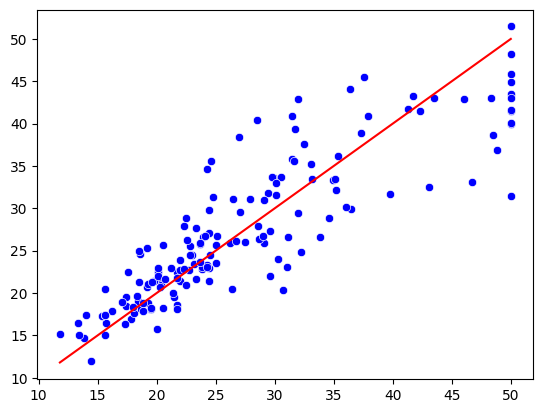

In [25]:
# PP đánh giá 2: Dùng Scatter giữa Actual và Predict
sns.scatterplot(x=y_train.flatten(), y=y_train_pre.flatten(), markers='o', color='b')
sns.lineplot(x=y_train.flatten(), y=y_train.flatten(), markers='s', color='r')

plt.show()

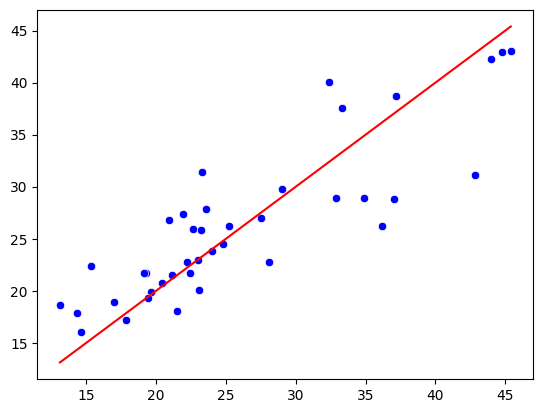

In [26]:
# PP đánh giá 2: Dùng Scatter giữa Actual và Predict
sns.scatterplot(x=y_test.flatten(), y=y_test_pre.flatten(), markers='o', color='b')
sns.lineplot(x=y_test.flatten(), y=y_test.flatten(), markers='s', color='r')

plt.show()
# dạng hình tập test giống train

In [27]:
#Cách 3: Dùng Residual Plot

In [28]:
y_test_pre = pipe.predict(x_test)
dfTestValidation = pd.DataFrame(list(zip(x_test[:,0], x_test[:,1], y_test.flatten(), y_test_pre.flatten())), columns=['Age_Test', 'LSTAT_Test', 'y_test', 'y_test_pre'])
dfTestValidation['Residual'] = dfTestValidation['y_test'] - dfTestValidation['y_test_pre']
dfTestValidation

,Age_Test,LSTAT_Test,y_test,y_test_pre,Residual
0,32.0,6.57,21.9,27.347463,-5.447463
1,79.9,9.42,27.5,27.028467,0.471533
2,32.9,3.53,32.4,40.055120,-7.655120
3,100.0,7.39,23.3,31.405562,-8.105562
4,53.8,16.03,22.4,21.697817,0.702183
5,42.1,13.00,21.1,21.483762,-0.383762
6,84.1,9.04,23.6,27.808131,-4.208131
7,85.2,14.09,20.4,20.774520,-0.374520
8,94.7,18.34,14.3,17.811659,-3.511659
9,97.9,11.12,23.0,22.920034,0.079966


In [29]:
y_train_pre = pipe.predict(x_train)
dfTrainValidation = pd.DataFrame(list(zip(x_train[:,0], x_train[:,1], y_train.flatten(), y_train_pre.flatten())), columns=['Age_Train', 'LSTAT_Train', 'y_train', 'y_train_pre'])
dfTrainValidation['Residual'] = dfTrainValidation['y_train'] - dfTrainValidation['y_train_pre']
dfTrainValidation

,Age_Train,LSTAT_Train,y_train,y_train_pre,Residual
0,100.0,27.80,13.8,14.748468,-0.948468
1,31.1,6.27,28.6,27.949084,0.650916
2,32.1,7.19,29.1,25.847902,3.252098
3,31.9,2.88,50.0,43.530454,6.469546
4,27.9,3.33,28.5,40.465671,-11.965671
...,...,...,...,...,...
155,80.8,7.60,30.1,31.601471,-1.501471
156,93.0,9.81,25.0,25.719893,-0.719893
157,95.2,11.32,22.3,22.874484,-0.574484
158,91.3,21.46,21.7,18.147695,3.552305


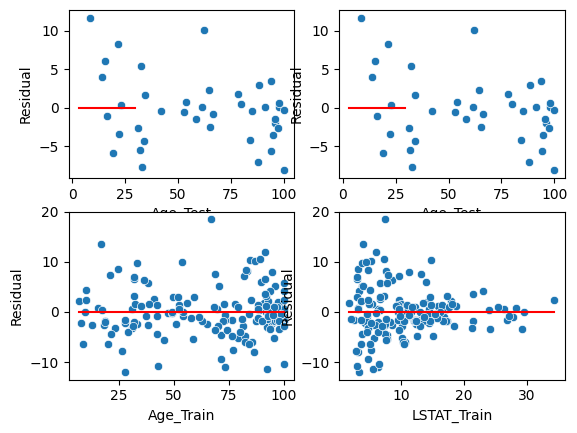

In [30]:
fig, axes = plt.subplots(2,2)
sns.scatterplot(data=dfTrainValidation, x='Age_Train', y='Residual', ax=axes[1,0])
sns.lineplot(data=dfTrainValidation, x='Age_Train', y=[0] * len(dfTrainValidation), color='r', ax=axes[1,0])

sns.scatterplot(data=dfTrainValidation, x='LSTAT_Train', y='Residual', ax=axes[1,1])
sns.lineplot(data=dfTrainValidation, x='LSTAT_Train', y=[0] * len(dfTrainValidation), color='r', ax=axes[1,1])

sns.scatterplot(data=dfTestValidation, x='Age_Test', y='Residual', ax=axes[0,0])
sns.lineplot(data=dfTestValidation, x='LSTAT_Test', y=[0] * len(dfTestValidation), color='r', ax=axes[0,0])

sns.scatterplot(data=dfTestValidation, x='Age_Test', y='Residual', ax=axes[0,1])
sns.lineplot(data=dfTestValidation, x='LSTAT_Test', y=[0] * len(dfTestValidation), color='r', ax=axes[0,1])

plt.show()

In [31]:
#Cách 4: 

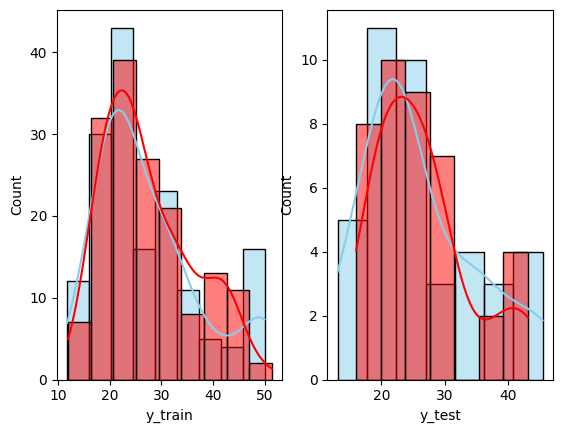

In [32]:
# Dùng histogram plot
# Tốt khi hình năm chồng chồng lên nhau @@
fig, axes = plt.subplots(1,2)
sns.histplot(data=dfTrainValidation, x='y_train', color='skyblue', label='Actual', kde=True, ax=axes[0])
sns.histplot(data=dfTrainValidation, x='y_train_pre', color='red', label='Forcast', kde=True, ax=axes[0])

sns.histplot(data=dfTestValidation, x='y_test', color='skyblue', label='Actual', kde=True, ax=axes[1])
sns.histplot(data=dfTestValidation, x='y_test_pre', color='red', label='Forcast', kde=True, ax=axes[1])


plt.show()

